# GERMS-ML

## Meeting #1: A brief demonstration of scikit-learn

We'll start off our machine learning group with an example of a small machine learning project. The dataset we'll be working with today is the [Optical Recognition of Handwritten Digits](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits), or MNIST, dataset. The dataset contains images of handwritten digits and corresponding labels. The MNIST dataset is considered the "Hello world" of machine learning because it's a small, tidy dataset that is good to work with when starting machine learning. Conveniently, we can load the MNIST dataset from `sklearn`: 

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

Let's learn a little more about our dataset. You can see all the different attributes of the digits object by calling `dir(digits)` (this is similar to the `attributes` function in `R`). You can then see what's in each element by doing calling `digits.<attribute>`. For example:

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels

We see that the `DESCR` attribute provides background information on the dataset.  Similarly, we can visualize the images in the dataset via the `images` attribute:

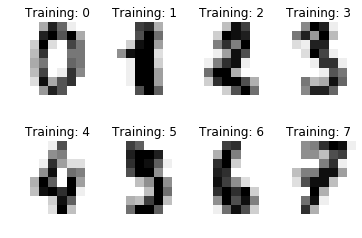

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
image_label_list = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(image_label_list[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Training: ' + str(label))

### Q1

* What do each of the attributes of `digits` represent?
* WhyRead `digits.DESCR`

Solutions.

Before we continue, we'll separate the `digits` `data` and `targets` attributes into separate objects to make it easier to work with:

In [5]:
digits_data = digits.data
digits_targets = digits.target

The next step we'll do is feature scaling. Typically, machine learning algorithms don't perform very well when the features in a dataset have different magnitudes. This is because most machine learning algorithms use some notion of distance when making decisions; if the data remains unscaled, those features with higher magnitudes will have more weight in the decision making process, regardless of the true importance of the feature itself.

The `scale` function from `sklearn.preprocessing` will transform the dataset to be centered at the mean and to have unit variance. To see it in action, let's look at one data point before transformation...

In [6]:
digits_data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

and after transformation:

In [7]:
from sklearn.preprocessing import scale
digits_data = scale(digits_data)

In [8]:
digits_data[1]

array([ 0.        , -0.33501649, -1.09493684,  0.03864775,  0.26875116,
       -0.13801953, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
       -1.91557297, -0.24630352,  1.19644995,  0.13619465, -0.51499146,
       -0.13043338, -0.04462507, -0.72764628, -1.2133854 ,  1.38030848,
        1.44186017, -0.29155283, -0.54880546, -0.11422184, -0.03337973,
        1.44018517,  0.95451315,  1.22058589,  0.98740215, -0.94558832,
       -0.62889588, -0.04723238,  0.        , -0.67237227, -1.05445197,
        1.10556952,  0.96064411, -0.97870236, -0.82269451,  0.        ,
       -0.06134367, -0.5312841 , -0.89983895,  1.36217503,  1.33078862,
       -0.39278683, -0.79827225, -0.08874162, -0.03543326, -0.40357499,
       -1.15311752,  1.23639392,  1.24208282, -0.45750018, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135, -1.08938309, -0.24900951,
        0.84963214,  0.54856067, -0.5056698 , -0.19600752])

This method of feature scaling is called standardization. Each data point $x$ is mapped to $x'$ by $$x' = \frac{x - \mu}{\sigma},$$ where $\mu$ and $\sigma$ are the mean and standard devation of the dataset, respectively. There are other methods of feature scaling, which we will cover in future weaks.

Next, we'll split the data into testing and training sets:

In [9]:
from sklearn.model_selection import train_test_split

x_train_full, x_test, y_train_full, y_test = train_test_split(
        digits_data, digits_targets, test_size = 0.2, random_state = 489)

In [10]:
x_train_full.shape, x_test.shape

((1437, 64), (360, 64))

In [11]:
y_train_full.shape, y_test.shape

((1437,), (360,))

And we'll further split the training set into training and validation sets:

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, 
                                                 test_size = 0.2, random_state = 489)

So now that we have our data split up, we're ready to start applying classifiers. We'll begin with the $k$-nearest neighbors, or `knn`, algorithm. The knn algorithm is straightforward - to classify a new point $x$, look at the $k$ points closest to  $x$; $x$ will take on the label that has the most votes. We can create a `knn` classifier (with $k = 1$) in the following way:

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_mnist = KNeighborsClassifier(n_neighbors = 1)

After we create the model, we *fit* it to our training data (note that there is no training step for knn). 

In [14]:
knn_mnist.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

Once we fit the model, we can then evaluate the performance of the trained `knn` model on our validation set by getting the percentage of correct classifications:

In [15]:
knn_mnist.score(x_val, y_val)

0.9791666666666666

That's not too bad: our `knn` model with $k = 1$ achieved a 97.9% validation accuracy. Let's see the performance on the validation set:

In [16]:
knn_mnist.score(x_test, y_test)

0.9638888888888889

We see that our model achieved a testing accuracy of 96.4%. 

### Q2

* It is expected that the testing accuracy be lower than the validation accuracy. Why?

The accuracy that we got for $k = 1$ wasn't bad, but will the model perform better if we try $k = 2$? Or $k = 3$? Or any other value? To explore the search space of hyperparameters, we could do something like the following to get a list of the accuracies for varying values of $k$:

In [17]:
k_values = [i + 1 for i in range(10)]
scores = []
for k in k_values:
    knn_mnist = KNeighborsClassifier(n_neighbors = k)
    knn_mnist.fit(x_train, y_train)
    scores.append(knn_mnist.score(x_val, y_val))

In [18]:
(highest_score, best_k) = max([(score, k + 1) for k, score in enumerate(scores)])
highest_score, best_k

(0.9791666666666666, 1)

We see that the best performing value for $k$ was indeed 1 with a testing accuracy of 97.9%.  Let's visualize the performance of our model by checking out the confusion matrix:

In [19]:
def plot_confusion_matrix(cm,
                          target_names,
                          normalize = True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    cmap = plt.get_cmap('Blues')

    plt.figure(figsize = (8, 6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment = "center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def get_confusion_matrix(predictor, x_test, y_test, labels):
    '''
    Helper method for plot_confusion_matrix
    
    Inputs:
        predictor: an sklearn predictor that has been fit
        x_test: the vector of features that predictor was trained on
        y_test: the labels from the holdout set
        labels: a vector containing the categories
    '''
    from sklearn.metrics import confusion_matrix
    y_pred = predictor.predict(x_test)
    cm = confusion_matrix(y_test, y_pred, labels)
    plot_confusion_matrix(cm, labels)

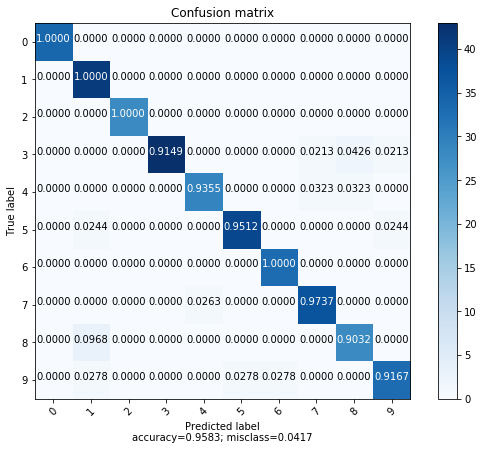

In [20]:
from sklearn.metrics import confusion_matrix

labels = [i for i in range(10)]

get_confusion_matrix(knn_mnist, x_test, y_test, labels)

### Q2

* How do you interpret a confusion matrix? 
* What do you expect the confusion matrix to look like when the predictor is performing well?
* Look at the rows with the worst performance. What do you think is going on?

The process of iterating through the possible values for $k$ and training the new model was relatively painless since we were only tuning 1 hyperparameter. However, this process can get tedious when tuning more than one hyperparameter. For example, suppose we wanted to further tune our `knn` model by testing more values of $k$ while also testing different values of $p$ and different `weights`. It's possible to repeat the process above, but`scikitlearn` provides the `GridSearchCV` method to exhaustively search all these combinations. 

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors': [i + 1 for i in range(20)], 'weights': ['uniform', 'distance']}]

knn_mnist = KNeighborsClassifier()
grid_search = GridSearchCV(knn_mnist, param_grid, cv = 10, scoring = 'accuracy')
grid_search.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

`param_grid` is a list of dictionaries describing the search space that you want `GridSearchCV` to explore. When you called, `GridSearchCV` will exhaust all $20 \times 2 \times 2 = 80$ combinations 10 times (the `cv` number) in order to find the combination of hyperparameters that optimizes the classifiers accuracy score. 

Let's see what the best score was:

In [22]:
grid_search.best_score_

0.9765013054830287

And what those parameters were:

In [23]:
grid_search.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

We see that the optimal value for $k$ was 6, and that a distance-weighted metric provided better classification.

We can retrieve the best model directly from the `grid_search` object:

In [24]:
knn_mnist = grid_search.best_estimator_

We then evaluate the performance of the model on the test set and visualize the confusion matrix:

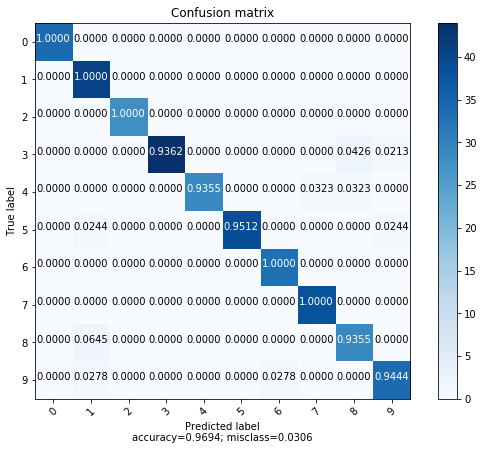

In [25]:
get_confusion_matrix(knn_mnist, x_test, y_test, labels)

### Q3.

* Repeat this process by traning a support vector machine on the MNIST data set (see [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)). What were the best parameters you found? Compare the performance of the two models. Why do you think one performed better than the other?
* When we originally determined that $k = 1$ was the optimal hyperparamter for the model, we achieved a validation accuracy of 97.9% and testing accuracy of 95.83%. However, the optimal model returned by the grid search had a lower validation accuracy of 97.6%, but a higher testing accuracy of 96.70%. What do you think is happening?